In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame=True)
print(iris.keys())

iris.frame["target"] = iris.target_names[iris.target]
sns.pairplot(iris.frame, hue="target")
plt.show()

## Crear variables

In [ ]:
variablex = iris["data"].values.reshape((-1, 4))
# seleccionar 2da y 3ra columna
variablex = variablex[:, [2,3]]
variabley = iris["target"].values.reshape((-1, 1))

# Seleccionar datos con clase 1 y 2
index = np.array([np.where(variabley == 1)[0], np.where(variabley == 2)[0]])
index = index.reshape(-1,1)
variablex = variablex[index].reshape(-1,2)
variabley = variabley[index].reshape(-1,1)

## Crear arboles de decision

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=42)

modelTree = DecisionTreeClassifier(criterion="gini", max_depth=3)
modelTree.fit(x_train, y_train)

y_pred = modelTree.predict(x_test)
f1 = f1_score(y_test, y_pred)
percent = modelTree.score(x_test, y_test)
print(f'f1_score: {f1}')
print(f'El modelo obtuvo {percent*100}% de precision en la clasificacion')

# Visualizar el arbol

In [ ]:
print(tree.export_text(modelTree, feature_names=["petal length (cm)", "petal width (cm)"]))

plt.figure(figsize=(12, 12))
tree.plot_tree(modelTree, feature_names=["petal length (cm)", "petal width (cm)"])
plt.show()

# Matriz de confusion

Clase 1: 12
Clase 2: 8


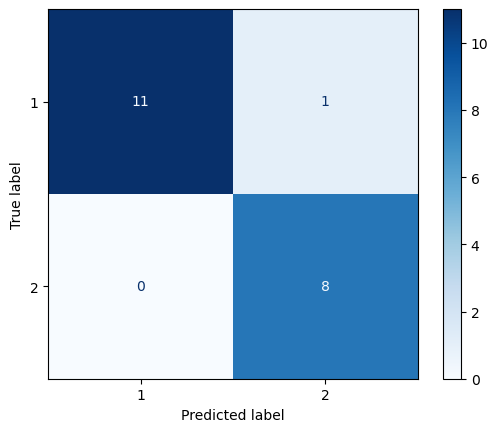

In [43]:
unique, counts = np.unique(y_test, return_counts=True)

for i in range(len(unique)):
    print(f'Clase {unique[i]}: {counts[i]}')

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=modelTree.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()
